In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()
df.data, df.target

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train_scaled, y_train)

LinearRegression()

In [7]:
regression.coef_

array([ 0.83476293,  0.11777367, -0.28065536,  0.31811433, -0.00187847,
       -0.04490105, -0.89429609, -0.87022139])

In [8]:
y_pred_linear = regression.predict(x_test_scaled)
y_pred_linear, y_test

(array([4.00867439, 1.58383893, 1.68448717, ..., 2.04667858, 1.91452732,
        4.96884989]),
 array([4.722  , 1.     , 1.875  , ..., 3.063  , 1.3    , 5.00001]))

In [9]:
from sklearn.linear_model import Ridge

# Гребнева регресія
regression_ridge = Ridge()

In [10]:
from sklearn.linear_model import Lasso

regression_lasso = Lasso()

In [11]:
from sklearn.linear_model import PoissonRegressor

regression_poisson = PoissonRegressor()

In [12]:
models = {
    "Linear regression": regression,
    "Ridge regression": regression_ridge,
    "Lasso regression": regression_lasso,
    "Poisson regression": regression_poisson
}

models_results = {
    "Linear regression": [],
    "Ridge regression": [],
    "Lasso regression": [],
    "Poisson regression": []
}

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

for model_name, model in models.items():    
    for n in [2, 4, 8]:
        x_train_sub = x_train_scaled[:, :n]
        x_test_sub = x_test_scaled[:, :n]

        model.fit(x_train_sub, y_train)
        print(f"{model_name} coef. with {n} features: {model.coef_}")
        
        y_pred = model.predict(x_test_sub)
        temp = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
        models_results[model_name].append([f"{value:.2f}" for value in temp])
    print()

Linear regression coef. with 2 features: [0.82032123 0.21917998]
Linear regression coef. with 4 features: [ 1.02056565  0.19708574 -0.53930319  0.48269474]
Linear regression coef. with 8 features: [ 0.83476293  0.11777367 -0.28065536  0.31811433 -0.00187847 -0.04490105
 -0.89429609 -0.87022139]

Ridge regression coef. with 2 features: [0.82026922 0.2191605 ]
Ridge regression coef. with 4 features: [ 1.02027444  0.19708934 -0.53869555  0.48213033]
Ridge regression coef. with 8 features: [ 0.83471985  0.11785536 -0.2804699   0.31787973 -0.00184854 -0.04490631
 -0.8935379  -0.86945501]

Lasso regression coef. with 2 features: [0. 0.]
Lasso regression coef. with 4 features: [ 0.  0.  0. -0.]
Lasso regression coef. with 8 features: [ 0.  0.  0. -0. -0. -0. -0. -0.]

Poisson regression coef. with 2 features: [0.22645806 0.05582509]
Poisson regression coef. with 4 features: [ 0.22417044  0.05603198  0.00859517 -0.0100701 ]
Poisson regression coef. with 8 features: [ 0.21901547  0.05397625  0.

In [14]:
models_results

{'Linear regression': [['0.66', '0.51'], ['0.62', '0.53'], ['0.54', '0.60']],
 'Ridge regression': [['0.66', '0.51'], ['0.62', '0.53'], ['0.54', '0.60']],
 'Lasso regression': [['1.33', '-0.00'], ['1.33', '-0.00'], ['1.33', '-0.00']],
 'Poisson regression': [['0.80', '0.40'], ['0.80', '0.40'], ['0.75', '0.43']]}

In [15]:
import pandas as pd

table1_data = {
    'Model': list(models_results.keys()),
    '2 features': [float(result[0][0]) for result in models_results.values()],
    '4 features': [float(result[1][0]) for result in models_results.values()],
    '8 features': [float(result[2][0]) for result in models_results.values()],
}

table1 = pd.DataFrame(table1_data)
table1.set_index('Model', inplace=True)

table2_data = {
    'Model': list(models_results.keys()),
    '2 features': [result[0][1] for result in models_results.values()],
    '4 features': [result[1][1] for result in models_results.values()],
    '8 features': [result[2][1] for result in models_results.values()],
}

table2 = pd.DataFrame(table2_data)
table2.set_index('Model', inplace=True)

/tmp/ipykernel_475190/2097915531.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
table1

,2 features,4 features,8 features
Model,,,
Linear regression,0.66,0.62,0.54
Ridge regression,0.66,0.62,0.54
Lasso regression,1.33,1.33,1.33
Poisson regression,0.80,0.80,0.75


In [17]:
table2

,2 features,4 features,8 features
Model,,,
Linear regression,0.51,0.53,0.60
Ridge regression,0.51,0.53,0.60
Lasso regression,-0.00,-0.00,-0.00
Poisson regression,0.40,0.40,0.43


In [18]:
table1['Mean'] = table1.mean(axis=1)

table1

,2 features,4 features,8 features,Mean
Model,,,,
Linear regression,0.66,0.62,0.54,0.606667
Ridge regression,0.66,0.62,0.54,0.606667
Lasso regression,1.33,1.33,1.33,1.330000
Poisson regression,0.80,0.80,0.75,0.783333


In [19]:
regression_analyze = []

for n in [2, 4, 8]:
        x_train_sub = x_train_scaled[:, :n]
        x_test_sub = x_test_scaled[:, :n]

        regression.fit(x_train_sub, y_train)
        
        y_pred = regression.predict(x_test_sub)
        regression_analyze.append([y_test, y_pred])

regression_analyze

[[array([4.722  , 1.     , 1.875  , ..., 3.063  , 1.3    , 5.00001]),
  array([4.12773463, 1.09365676, 1.52309506, ..., 2.20261614, 1.3946711 ,
         4.92887072])],
 [array([4.722  , 1.     , 1.875  , ..., 3.063  , 1.3    , 5.00001]),
  array([4.17922097, 1.35606972, 1.70325288, ..., 2.1135647 , 1.8277637 ,
         4.90902258])],
 [array([4.722  , 1.     , 1.875  , ..., 3.063  , 1.3    , 5.00001]),
  array([4.00867439, 1.58383893, 1.68448717, ..., 2.04667858, 1.91452732,
         4.96884989])]]

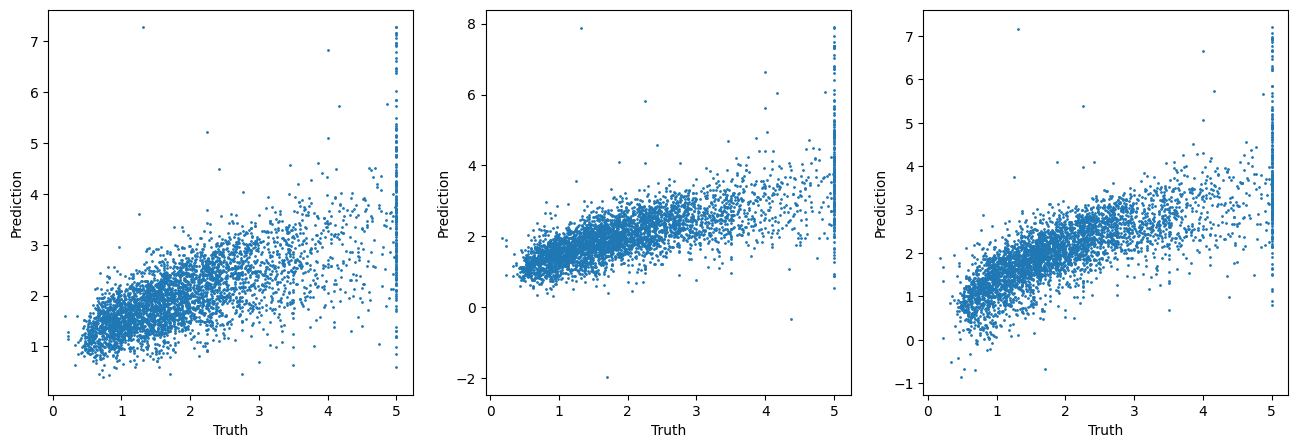

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

for i, sublist in enumerate(regression_analyze):
    axs[i].scatter(sublist[0], sublist[1], s=1)
    axs[i].set_xlabel('Truth')
    axs[i].set_ylabel('Prediction')